In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

# Guardian Raids

In [3]:
resources = ['red', 'blue', 'stones']
boss_order = ['Armored Nacrasena', 'Igrexion', 'Night Fox Yoho'] #, 'Velganos']

In [6]:
df = (
    pd.read_csv('histories/gr.csv')
    .query('ilvl >= 1100')         # tier 3 only
    .query('first_time == False')  # ignore first time bonus
    .query('stones > 0')           # some obvious erroneous entries
)
df.boss = df.boss.apply(lambda x: boss_order.index(x))

df.head()

,timestamp,character,ilvl,boss,at_level,rested,first_time,red,blue,stones
0,2022-04-14-20:52:33,Jazzercist,1334,0,True,False,False,22,69,2
2,2022-04-15-09:53:15,Jazzercist,1340,1,True,False,False,30,77,5
3,2022-04-15-11:31:46,Derplearning,1309,0,True,True,False,43,130,5
4,2022-04-15-11:39:16,Derplearning,1309,0,True,False,False,23,69,3
6,2022-04-15-22:35:42,Trif,1370,2,True,False,False,36,107,4


## Overview

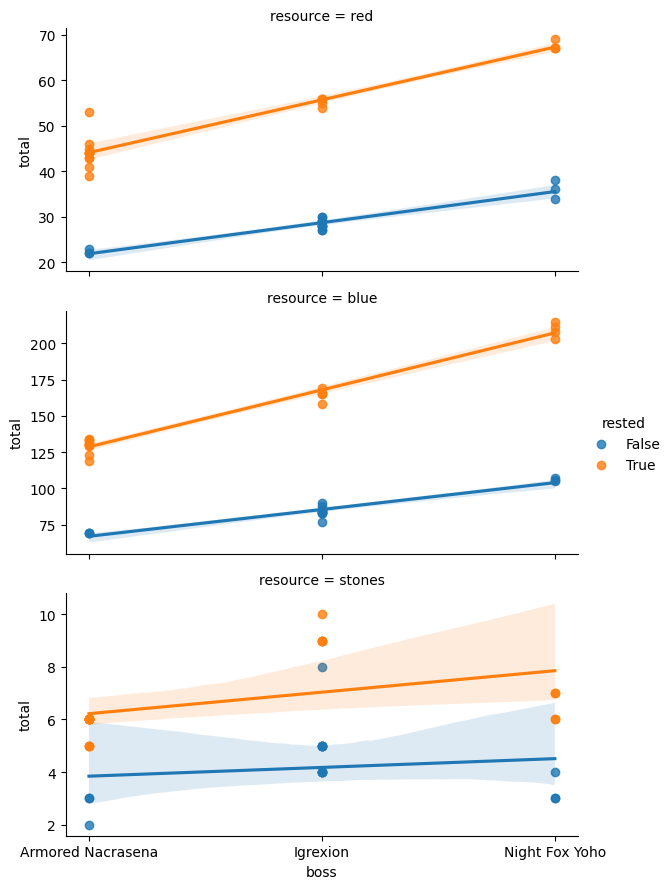

In [7]:
sb.lmplot(
    data=df.melt(
        id_vars=['timestamp', 'rested', 'boss'],
        value_vars=resources,
        var_name='resource',
        value_name='total',
    ),
    x='boss',
    y='total',
    row='resource',
    hue='rested',
    facet_kws=dict(sharey=False),
    aspect=2,
    height=3,
)
plt.xticks(ticks=range(len(boss_order)), labels=boss_order);


### Stats

In [128]:
df.groupby(['rested', 'boss'])[resources].aggregate(['min', 'mean', 'max']).applymap(round)

red          blue           stones         
                         min mean max  min mean  max    min mean max
rested boss                                                         
False  Armored Nacrasena  22   22  23   69   69   69      2    3   3
       Igrexion           27   28  30   77   84   90      4    5   8
       Night Fox Yoho     34   36  38  105  106  107      3    3   4
True   Armored Nacrasena  39   44  53  119  129  134      5    6   6
       Igrexion           54   55  56  158  165  169      9    9  10
       Night Fox Yoho     67   68  69  203  209  215      6    6   7

### Expected Values

In [129]:
df.groupby(['rested', 'boss'])[resources].mean().applymap(round)

red  blue  stones
rested boss                                
False  Armored Nacrasena   22    69       3
       Igrexion            28    84       5
       Night Fox Yoho      36   106       3
True   Armored Nacrasena   44   129       6
       Igrexion            55   165       9
       Night Fox Yoho      68   209       6

## Red Rocks

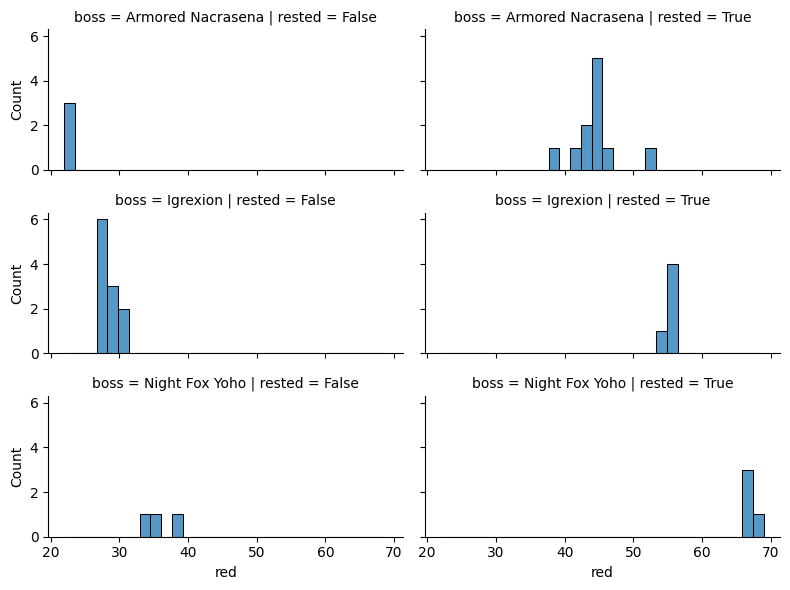

In [130]:
sb.displot(df, x='red', col='rested', row='boss', aspect=2, height=2, bins=30)

## Blue Rocks

In [131]:
df.groupby(['boss', 'rested'])['blue'].agg(['min', 'mean', 'max']).applymap(round).T

boss   Armored Nacrasena      Igrexion      Night Fox Yoho     
rested             False True    False True          False True
min                   69  119       77  158            105  203
mean                  69  129       84  165            106  209
max                   69  134       90  169            107  215

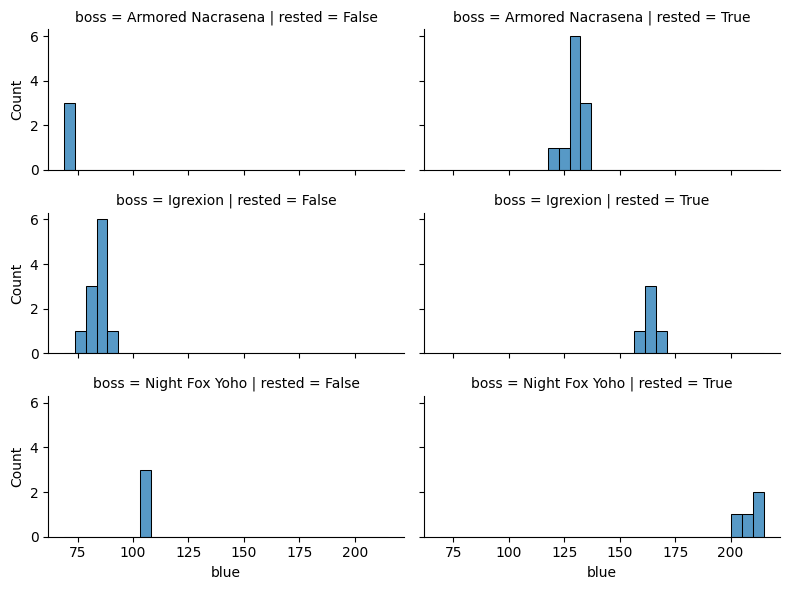

In [132]:
sb.displot(df, x='blue', row='boss', col='rested', height=2, aspect=2, bins=30)

## Stones

In [133]:
df.groupby(['boss', 'rested'])['stones'].agg(['min', 'mean', 'max']).applymap(round).T

boss   Armored Nacrasena      Igrexion      Night Fox Yoho     
rested             False True    False True          False True
min                    2    5        4    9              3    6
mean                   3    6        5    9              3    6
max                    3    6        8   10              4    7

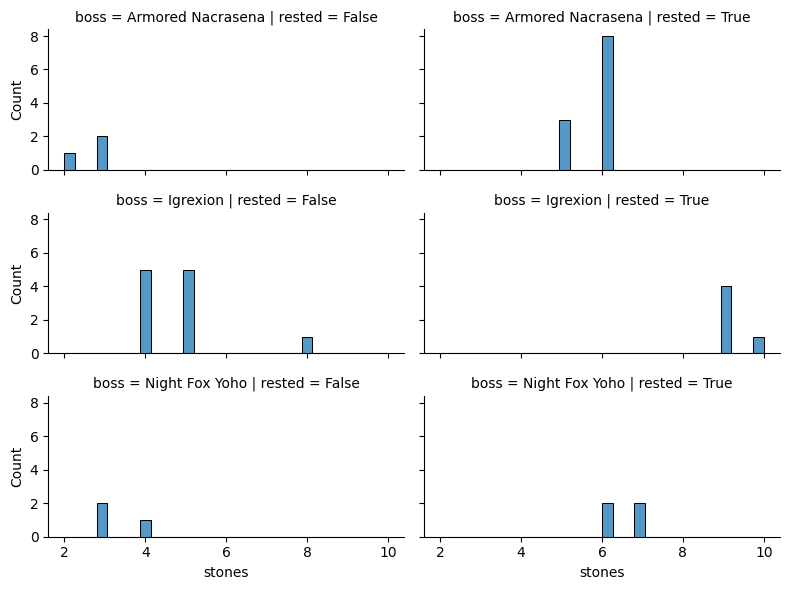

In [134]:
sb.displot(df, x='stones', row='boss', col='rested', height=2, aspect=2, bins=30)